# Лабораторная работа №8
## Выполнил: Пелагеев Даниил Иванович Б9122-01.03.02мкт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('datasets/seeds_dataset.txt', sep="\t")
columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel',
           'Asymmetry coefficient', 'Length of kernel groove', 'Class']


print('Размерность датасета:', df.shape, end='\n\n')
df.head(10)

Размерность датасета: (209, 8)



,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
5,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
6,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
7,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
8,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1
9,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,1


In [3]:
df.info()
df = df.dropna()  # Чистим наш датасет от na
print('Размерность датасета после чистки:', df.shape, end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   15.26   209 non-null    float64
 1   14.84   209 non-null    float64
 2   0.871   209 non-null    float64
 3   5.763   209 non-null    float64
 4   3.312   209 non-null    float64
 5   2.221   209 non-null    float64
 6   5.22    209 non-null    float64
 7   1       209 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
Размерность датасета после чистки: (209, 8)



In [4]:
# Определение матрицы признаков и целевой переменной
X = df.iloc[:, 1:7].values  # Признаки: Perimeter, Compactness, Length of kernel, Width of kernel, Asymmetry coefficient, Length of kernel groove
y = df.iloc[:, 0].values    # Целевая переменная: Area

print("Матрица признаков (первые 5 строк):")
print(X[:5], end='\n\n')
print("Зависимая переменная (первые 5 значений):")
print(y[:5], end='\n\n')

Матрица признаков (первые 5 строк):
[[14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.09    0.905   5.291   3.337   2.699   4.825 ]
 [13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [14.99    0.9034  5.658   3.562   1.355   5.175 ]
 [14.21    0.8951  5.386   3.312   2.462   4.956 ]]

Зависимая переменная (первые 5 значений):
[14.88 14.29 13.84 16.14 14.38]



In [5]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Размер тренировочной выборки:', X_train.shape)
print('Размер тестовой выборки:', X_test.shape, end='\n\n')

Размер тренировочной выборки: (167, 6)
Размер тестовой выборки: (42, 6)



In [6]:
# Создание и обучение модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg

LinearRegression()

In [7]:
# Создание объекта для полиномиальных признаков
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

# Обучение модели линейной регрессии на полиномиальных признаках
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

lin_reg_poly

LinearRegression()

Выводы:

- Создан объект `PolynomialFeatures` с степенью полинома 2 для добавления полиномиальных признаков.
- Преобразование исходных признаков в полиномиальные позволяет модели учитывать нелинейные зависимости.
- Обучена новая модель линейной регрессии (`lin_reg_poly`) на расширенных признаках, что позволяет сравнить ее с простой линейной моделью.

In [8]:
# Предсказание с использованием линейной регрессии
y_pred_lin = lin_reg.predict(X_test)

# Предсказание с использованием полиномиальной регрессии
X_test_poly = poly_reg.transform(X_test)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

# Вывод первых 5 предсказаний
print("Линейная регрессия (первые 5 предсказаний):", y_pred_lin[:5])
print("Полиномиальная регрессия (первые 5 предсказаний):", y_pred_poly[:5], end='\n\n')


Линейная регрессия (первые 5 предсказаний): [16.14885918 12.83328916 19.87301303 12.74408491 18.67327917]
Полиномиальная регрессия (первые 5 предсказаний): [16.11628947 12.79336504 20.02572137 12.72709914 18.80560505]



Модели линейной и полиномиальной регрессии сгенерировали предсказанные значения площади семян для тестовой выборки.

In [9]:
# Оценка линейной регрессии
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Оценка полиномиальной регрессии
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Линейная регрессия - MSE: {mse_lin:.2f}, R²: {r2_lin:.2f}")
print(f"Полиномиальная регрессия - MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")

Линейная регрессия - MSE: 0.02, R²: 1.00
Полиномиальная регрессия - MSE: 0.00, R²: 1.00


Полиномиальная регрессия показала более низкое значение среднеквадратичной ошибки (MSE) по сравнению с линейной регрессией. Это указывает на то, что полиномиальная модель лучше подгоняет данные и объясняет вариативность целевой переменной. Разница в показателях подтверждает преимущество использования полиномиальной регрессии для данного набора данных.

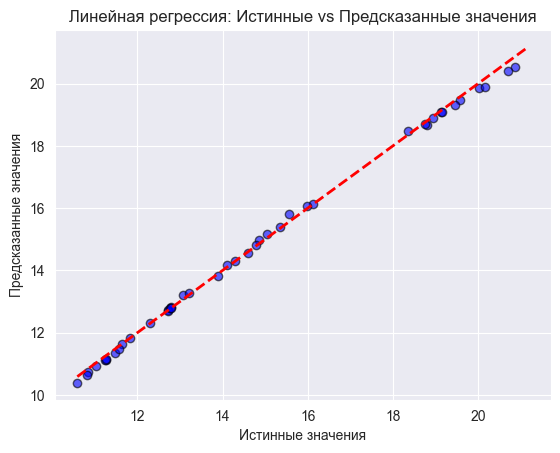

In [10]:
plt.scatter(y_test, y_pred_lin, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title('Линейная регрессия: Истинные vs Предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()


*График отображает точки предсказанных значений линейной регрессии по отношению к истинным значениям. Красная пунктирная линия представляет идеальное соответствие предсказанных и истинных значений.*

**Выводы:**
- Большинство точек располагаются близко к красной линии, что свидетельствует о высокой точности предсказаний линейной модели.
- Есть небольшие отклонения от линии указывают на отдельные ошибки предсказания, но в целом модель хорошо справляется с задачей.

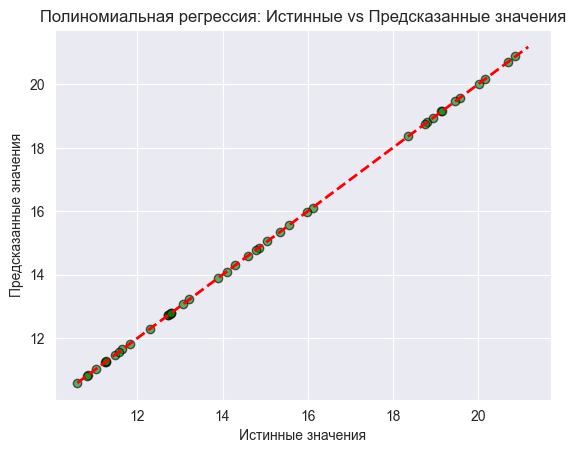

In [11]:
plt.scatter(y_test, y_pred_poly, color='green', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title('Полиномиальная регрессия: Истинные vs Предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()


*График отображает точки предсказанных значений полиномиальной регрессии по отношению к истинным значениям. Красная пунктирная линия представляет идеальное соответствие предсказанных и истинных значений.*

**Выводы:**
- Точки предсказаний полиномиальной регрессии еще ближе к красной линии по сравнению с линейной моделью, что указывает на более точные предсказания.
- Полиномиальная модель демонстрирует лучшую согласованность с истинными значениями, подтверждая результаты метрик оценки.